# Import data

In [1]:
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


# Visualization

## Area Plot

### Questions:
<ol>
<li>What are the top 5 borough that has the most most crime from 2010 - 2015?</li>
<li>What is the highest number of crime per year in each borough from 2010 - 2015?</li>
</ol>

Top 5 borough from 2010 - 2015

In [4]:
sum_values = (
  df.loc[(df["year"] >= 2010) & (df["year"] <= 2015), 
  ["borough", "value"]].groupby(["borough"])["value"].sum()   
)

top_5_borough = list(sum_values.index[:5])

df_top_5 = df.loc[
  (df["borough"].isin(top_5_borough)) & ((df["year"] >= 2010) & (df["year"] <= 2015))
  , ["borough", "value", "year"]
]

Create new dataframe

In [5]:
years = [2010, 2011, 2012, 2013, 2014, 2015]

new_df = pd.DataFrame(
  columns=top_5_borough
)

for year in years:
  data = {}
  for borough in top_5_borough:
    data[borough] = df_top_5[(df_top_5["borough"] == borough) & (df_top_5["year"] == int(year))]["value"].sum()
  row = pd.Series(data=data, name=year)
  new_df = new_df.append(row, ignore_index=False)

Plotting

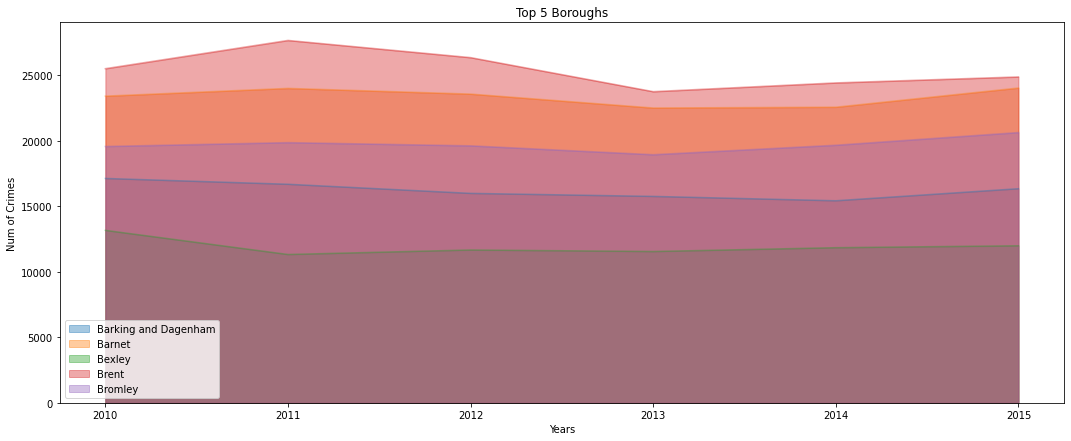

In [6]:
new_df.plot(kind="area", stacked=False, alpha=0.4, figsize=(18, 7))
plt.xlabel("Years")
plt.ylabel("Num of Crimes")
plt.title("Top 5 Boroughs")
plt.show()

### Insight:

<ol>
<li>From the chart we can see the top 5 countries that have the most crimes are Barking and Dagenham, Barnet,  Bexlex, Brent, Bromley</li>
<li>
Highest crimes per year from 2010 - 2015:<br>
  <ul>
    <li>Barking and Dagenham : 17130</li>
    <li>Barnet : 24036</li>
    <li>Bexley : 13166</li>
    <li>Brent : 27669</li>
    <li>Bromley : 20637</li>
  </ul>
</li>
</ol>
<br>
<hr size=5 color="white">

## Histogram

### Questions:
<ol>
<li>How many boroughs has the crime count from 0 - 532000?</li>
</ol>

In [7]:
df_crime_category_value = (
  df.
  loc[:, ["major_category", "value"]].
  groupby(["major_category"], as_index=False)["value"].
  sum()   
)
df_crime_category_value.set_index("major_category", inplace=True)

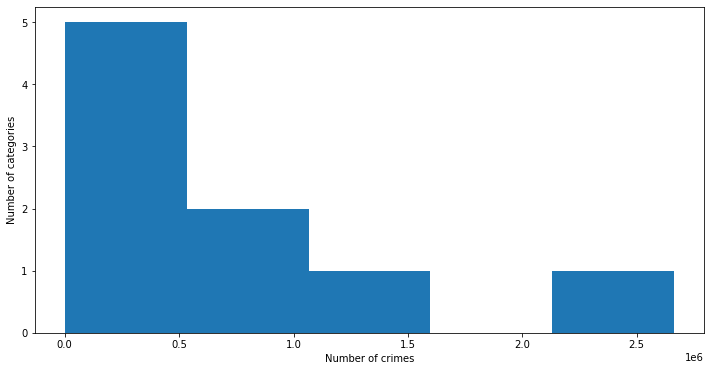

In [8]:
freq, bins = np.histogram(df_crime_category_value["value"], bins=5)
df_crime_category_value["value"].plot(kind="hist", figsize=(12, 6), bins=bins)
plt.xlabel("Number of crimes")
plt.ylabel("Number of categories")
plt.show()

### Insight:

From the histogram we can conclude that the number of boroughs that has crime count of 0 - 532.000 is 5 boroughs
<br><br>
<hr size=5 color="white">

## Bar Chart

### Questions:
<ol>
<li>Which borough has the most number of crimes throughout 2010 - 2015?</li>
<li>Which borough has the least number of crimes throughout 2010 - 2015?</li>
</ol>

In [9]:
df_bar = df.loc[:, ["borough", "value"]].groupby(["borough"], as_index=False)["value"].sum()
df_bar.set_index("borough", inplace=True)

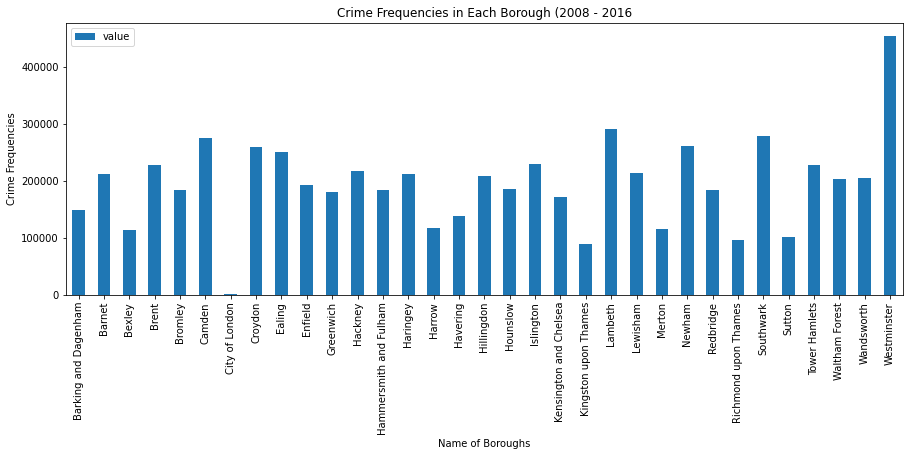

In [10]:
df_bar.plot(kind="bar", figsize=(15, 5))
plt.xlabel("Name of Boroughs")
plt.ylabel("Crime Frequencies")
plt.title("Crime Frequencies in Each Borough (2008 - 2016")
plt.show()

### Insight:

From the Bar Chart we can conclude the borough that has the most number of crimes throughout 2008 - 2016 is Westminster and the least number is City of London
<br><br>
<hr size=5 color="white">

## Pie Chart

### Questions:
<ol>
<li>Which year has the most number of crimes between 2010 - 2015?</li>
<li>Which year has the least number of crimes between 2010 - 2015</li>
</ol>

In [11]:
df_pie = (
  df[(df["major_category"] == "Burglary") & ((df["year"] >= 2010) & (df["year"] <= 2015))].
  loc[:, ["year", "value"]].
  groupby(["year"], as_index=False)["value"].
  sum().
  sort_values(by=["value"], ascending=False)
)
df_pie.set_index("year", inplace=True)

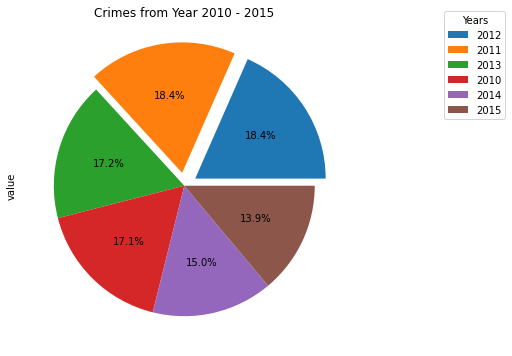

In [12]:
df_pie["value"].plot(
  kind="pie",
  figsize=(15, 6),
  autopct="%1.1f%%",
  labels=None,
  explode = (0.1, 0.1 , 0, 0, 0, 0)
)
plt.legend(
  labels=df_pie.index, 
  bbox_to_anchor=(1.5, 1.05), 
  title="Years"
)
plt.title("Crimes from Year 2010 - 2015")
plt.show()

### Insight:

From the pie chart we can conclude that year 2011 & 2012 with percentage of 18.4% for each year. The least is year 2015 with 13.9%
<br><br>
<hr size=5 color="white">

## Box Plot

### Questions:
<ol>
<li>What is the median of Burglary for period of 2013 - 2016?</li>
<li>What is the median of Criminal Damage for period of 2013 - 2016?</li>
<li>Which type of crime is more common?</li>
</ol>

In [13]:
df_burg_rob = df[(df["major_category"] == "Burglary") | (df["major_category"] == "Criminal Damage")]
new_df = pd.DataFrame(index=["Burglary", "Criminal Damage"], columns=["2013", "2014", "2015", "2016"])

for year in new_df.columns:
  new_df.at["Burglary", year] = (
    df[(df["major_category"] == "Burglary") & (df["year"] == int(year))].loc[:]["value"].sum()  
  ) 
  new_df.at["Criminal Damage", year] = (
    df[(df["major_category"] == "Criminal Damage") & (df["year"] == int(year))].loc[:]["value"].sum()
  )

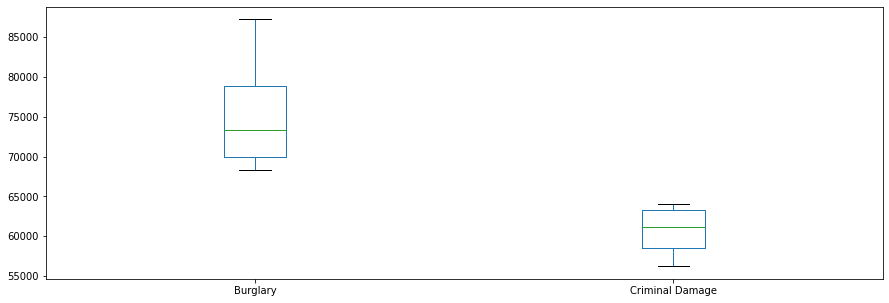

In [14]:
box = new_df.T
box.plot(kind="box", figsize=(15, 5))
plt.show()

### Insight

As we can see from the box plot. The median for Burglary and Criminal Damage is 73271 & 61127 consecutively. So we can conclude that Burglary is more common than Criminal Damage because of the higher median number.
<br><br>
<hr size=5 color="white">

## Scatter Plot

### Questions:
<ol>
<li>Do the number of crime increasing each year?</li>
</ol>

In [15]:
df_scatter = df.loc[:, ["year", "value"]].groupby(["year"]).sum()
df_scatter["year"] = df_scatter.index

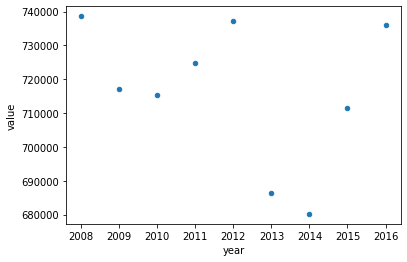

In [16]:
df_scatter.plot(kind="scatter", x="year", y="value")
plt.show()

### Insight

The number of crimes seems to decrease dramatically in year 2013 and 2014 but increase again in the next years. So the conclusion is the crime number doesn't increase every year.
<br><br>
<hr size=5 color="white">

## Word Clouds

### Questions:
<ol>
<li>What is the top 5 minor category?</li>
</ol>

In [17]:
df_word_cloud = df[(df["value"] != 0)].loc[:, ["minor_category", "value"]].groupby(["minor_category"]).sum()
minor_categories, frequencies = list(df_word_cloud.index), list(df_word_cloud["value"])
data = dict(zip(minor_categories, frequencies))

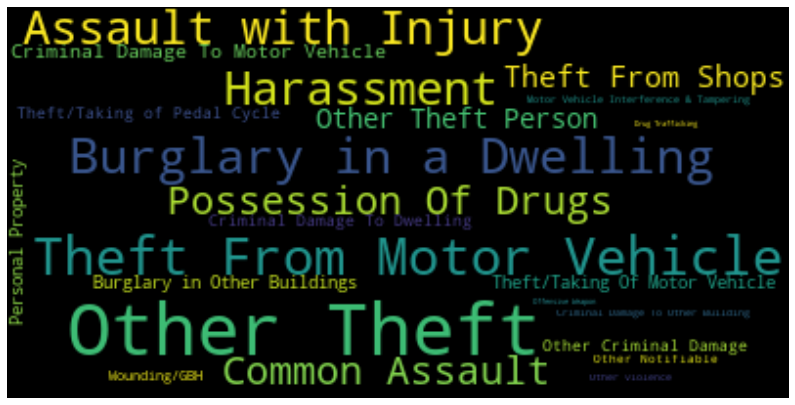

In [18]:
word_cloud = WordCloud(collocations=False).generate_from_frequencies(data)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(8)

plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Insight

From the Word Cloud we got the top 5 minor categories:
<ol>
  <li>Other Theft</li>
  <li>Burglary in a Dwelling</li>
  <li>Assault with Injury</li>
  <li>Theft From Motor Vehicle</li>
  <li>Harassment</li>
</ol>
<br><br>
<hr size=5 color="white">

## Folium

### Questions:
<ol>
<li>What is the top 5 minor category?</li>
</ol>

In [19]:
limit = 100
df_incidents = df.sample(100, random_state=1)

In [20]:
import requests
import urllib.parse

borough_long_lat = []

for borough in df_incidents["borough"].unique():
  address = f'{borough}, London'
  url = f'https://nominatim.openstreetmap.org/search/{address}?format=json'

  response = requests.get(url).json()
  data = {
      "name": borough,
      "lat": response[0]["lat"],
      "lon": response[0]["lon"],
      "labels": ", ".join(list(df[df["borough"] == "Harrow"]["major_category"].unique()))
  }
  borough_long_lat.append(data)

In [21]:
# London lat and lon
lat = 51.5123
lon = 0.0910

london_map = folium.Map(location=[lat, lon], zoom_start=10)

In [22]:
incidents = folium.map.FeatureGroup()

for data in borough_long_lat:
  incidents.add_child(
      folium.CircleMarker(
          [float(data["lat"]), float(data["lon"])],
          radius=5,
          color="yellow",
          fill=True,
          fill_color="blue",
          fill_opacity=.7,
      )
  )

for data in borough_long_lat:
  folium.Marker([float(data["lat"]), float(data["lon"])], popup=data["labels"]).add_to(london_map)

london_map.add_child(incidents)